<a href="https://colab.research.google.com/github/trungtran310102/Customer-Churn-Prediction-trungtlt/blob/main/bank_churn_predict_trungtlt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of content**

*   1. Thiết lập môi trường và nhập dữ liệu
  *   1.1 Thiết lập môi trường, import thư viện
  *   1.2 Đọc dữ liệu
*   2. Xem qua dữ liệu - EDA
*   3. Tiền xử lý dữ liệu
*   4. Lựa chọn và đánh giá mô hình
  *   4.1 Exp 01: Upsampling = SMOTE, Scale = MINMAX, Model: Logistic Regression
  *   4.2 Exp 02: Không UpSampling, không Scale, Model: XGBOOST









# **1. Thiết lâp môi trường và nhập dữ liệu**

**1.1 Thiết lập môi trường, import thư viện**

In [ ]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

In [73]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

**1.2 Đọc dữ liệu**

In [43]:
# Đọc dữ liệu đầu vào từ file train.csv
customer_data = pd.read_csv("/content/train.csv")

In [44]:
customer_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


# **2. Xem qua dữ liệu - EDA**

In [45]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [46]:
# Kiểm tra dữ liệu null
customer_data.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [47]:
object_cols = [f for f in customer_data.columns if customer_data[f].dtype =="O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


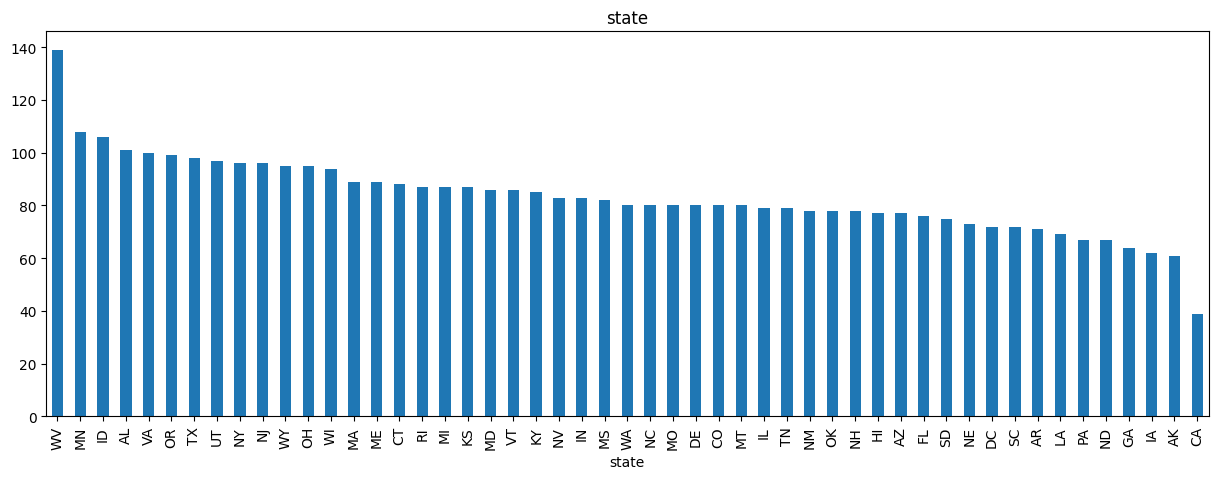

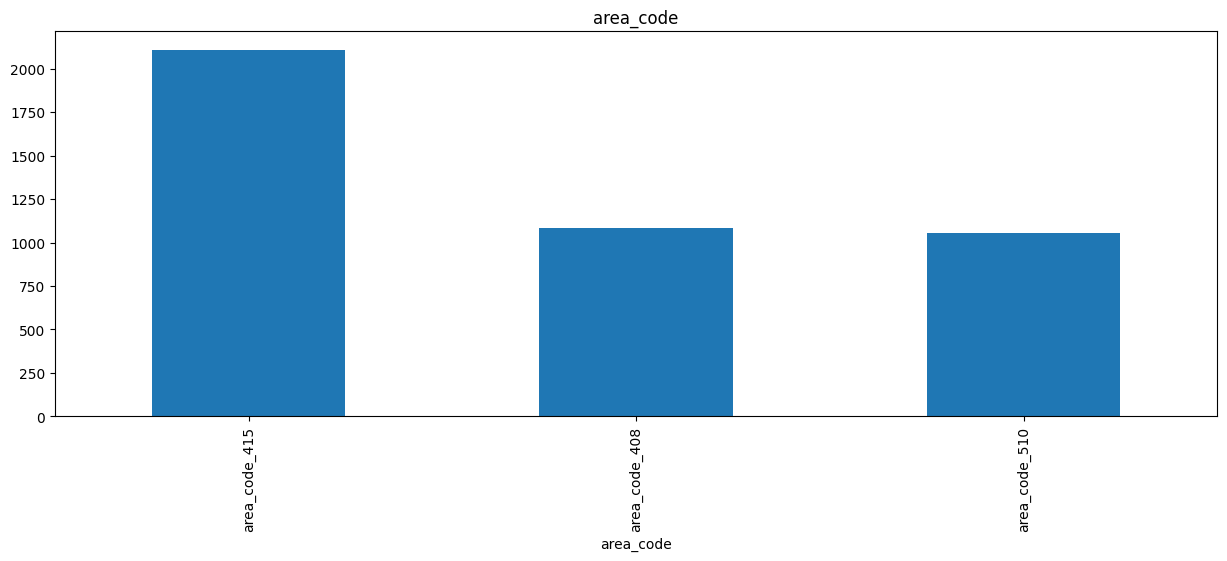

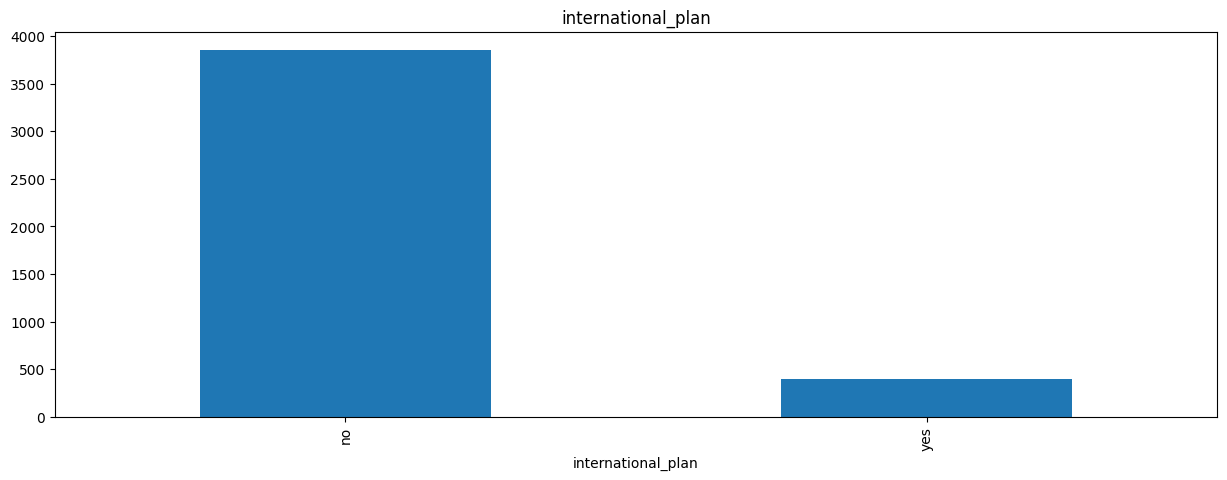

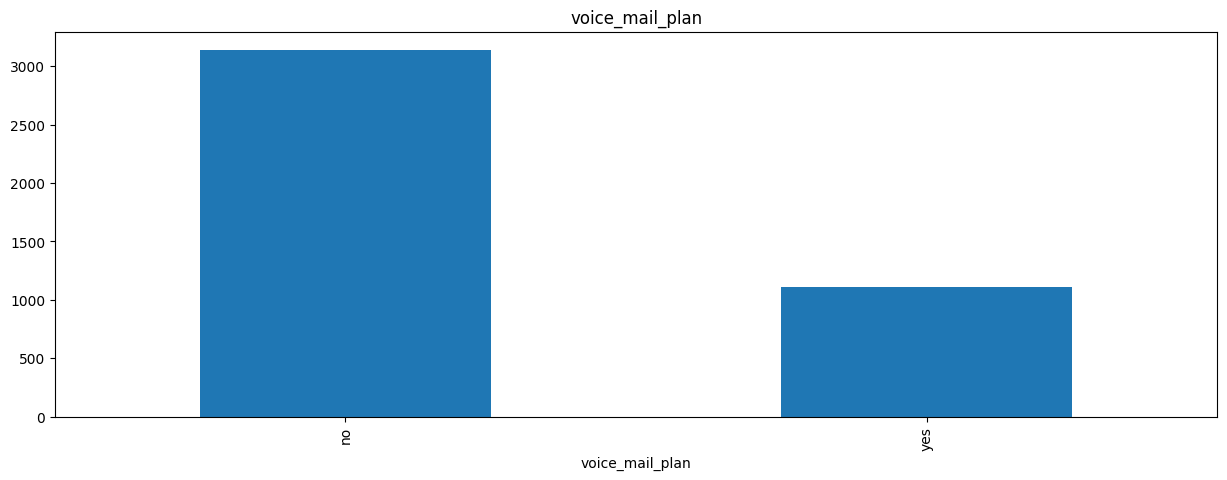

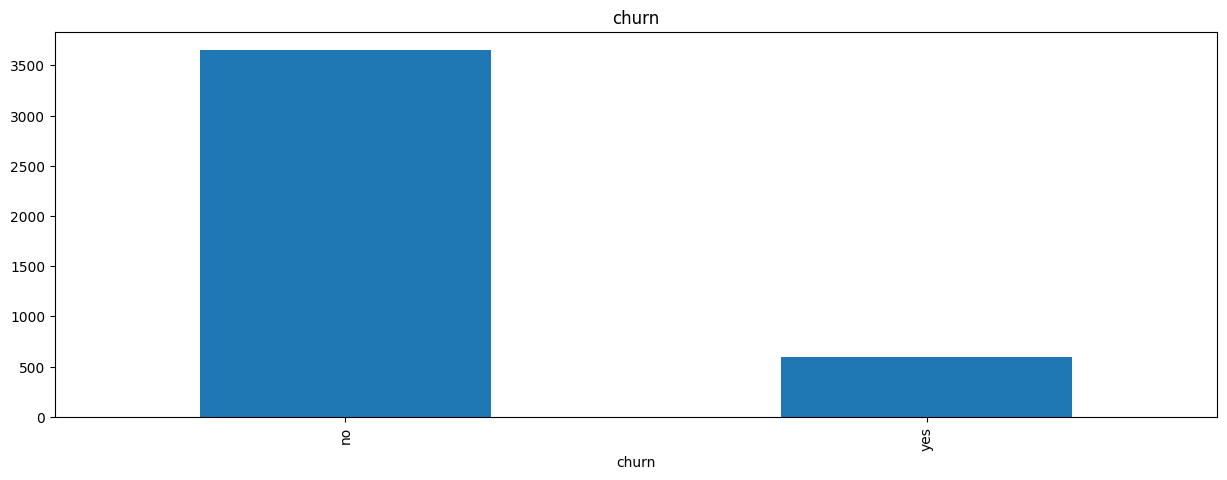

In [48]:
# Trực quan hóa các trường dữ liệu bằng biểu đồ
for col in object_cols:
  customer_data[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [49]:
numeric_cols = [f for f in customer_data.columns if customer_data[f].dtype !="O"]
print(numeric_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


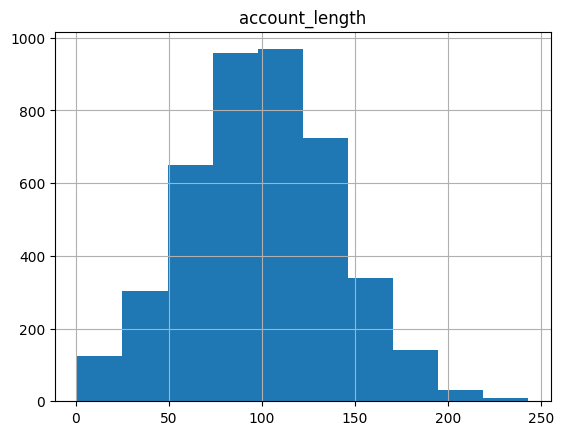

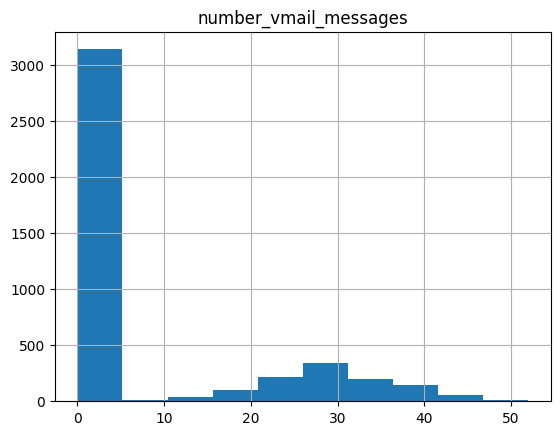

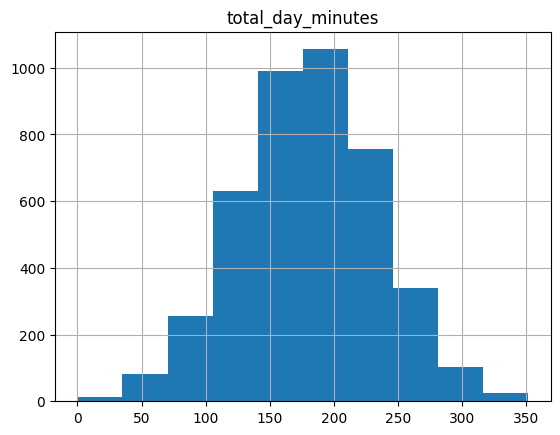

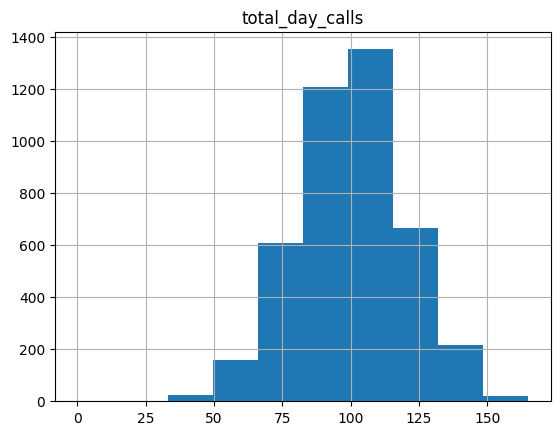

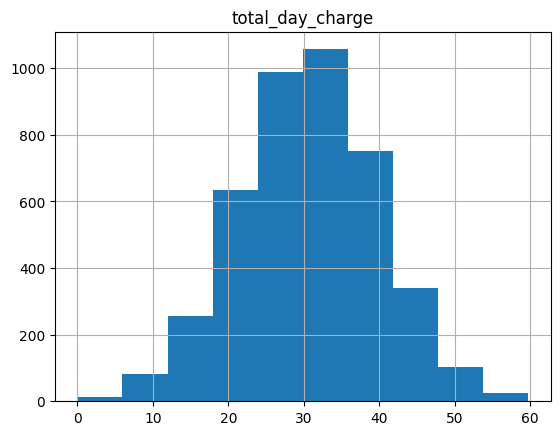

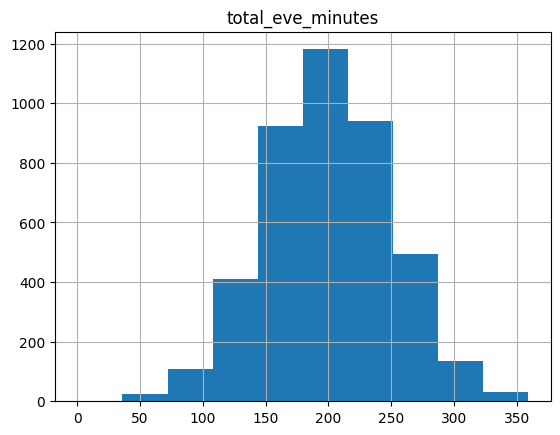

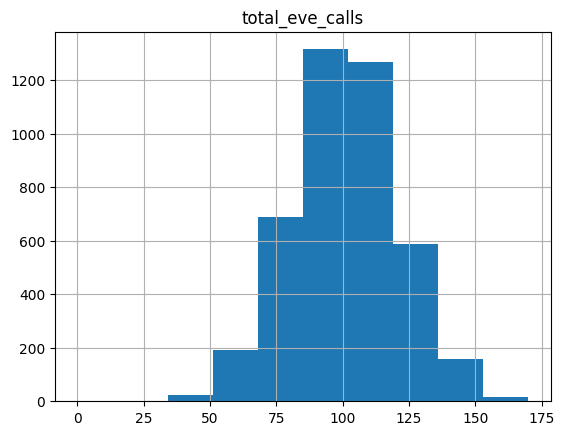

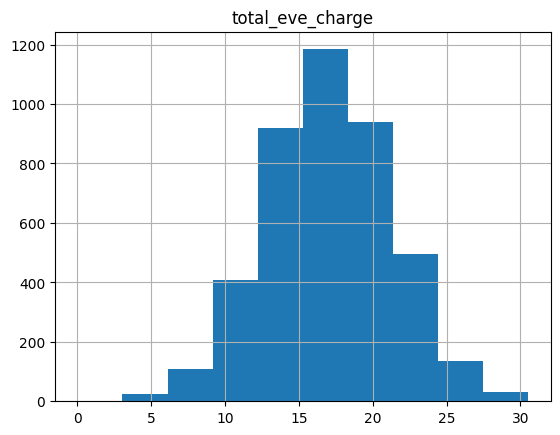

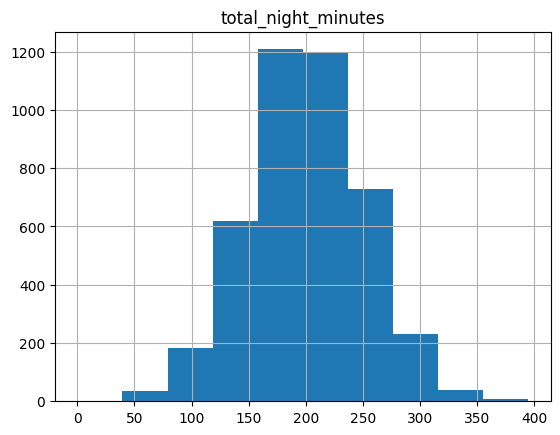

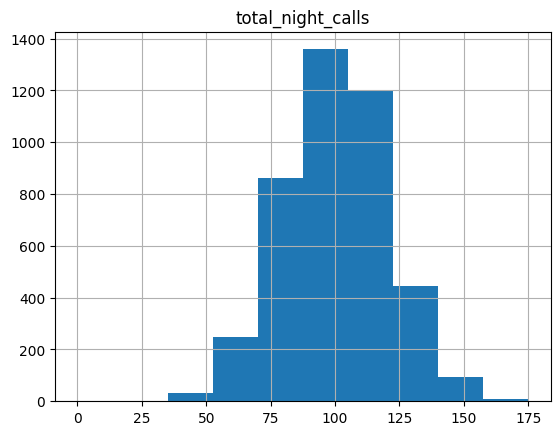

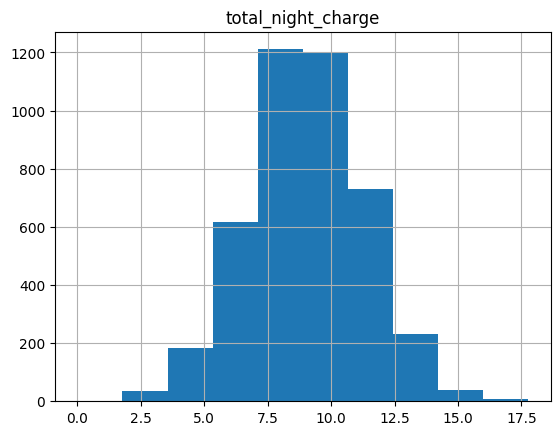

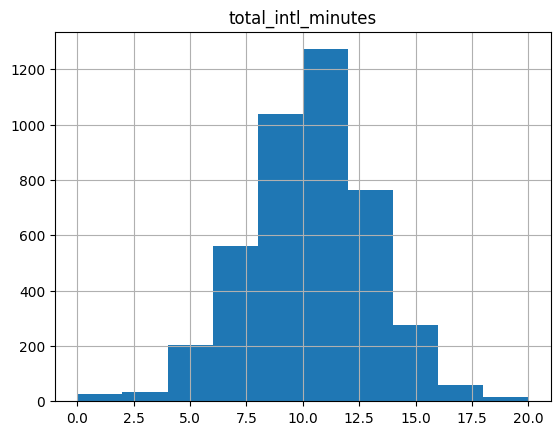

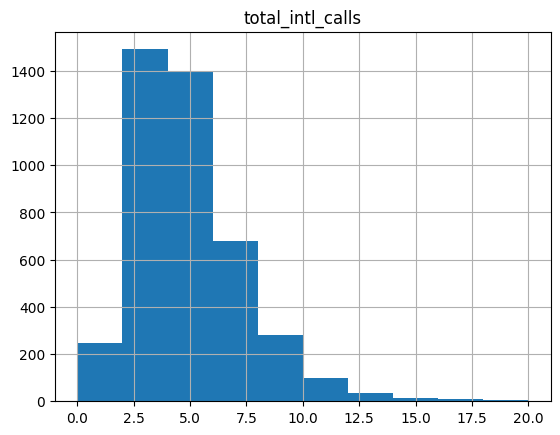

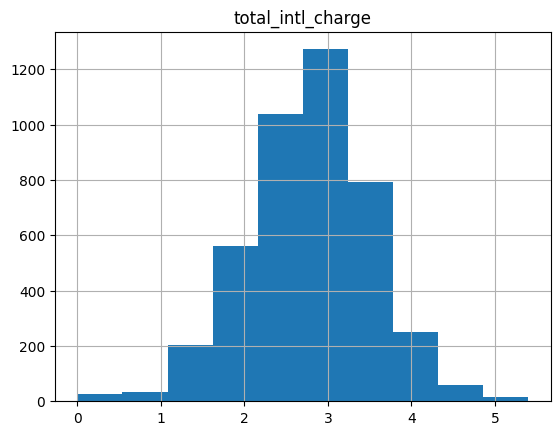

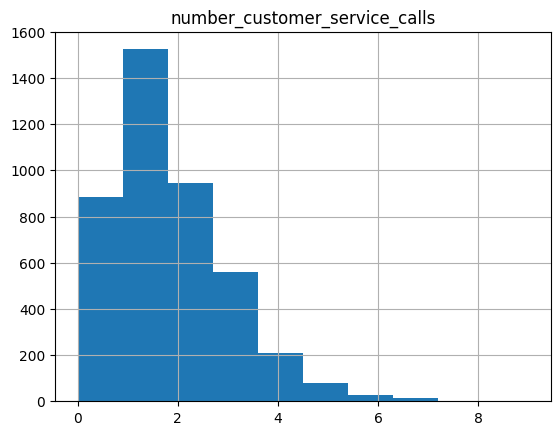

In [50]:
# Trực quan hóa sử dụng biểu đồ Histogram
for col in numeric_cols:
  customer_data[col].hist()
  plt.title(col)
  plt.show()

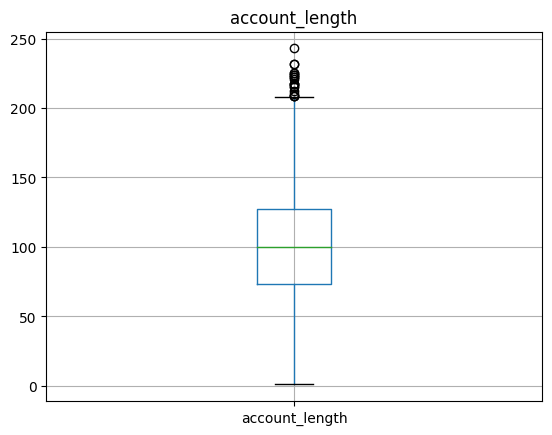

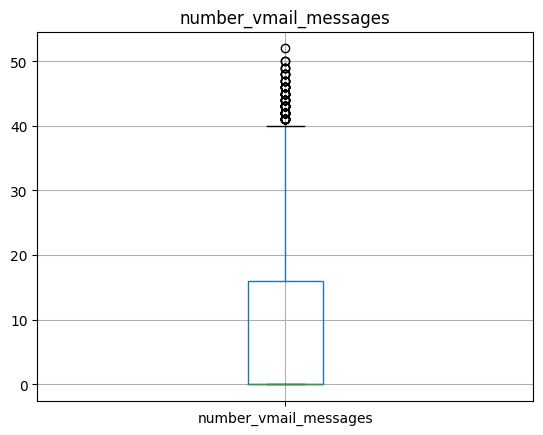

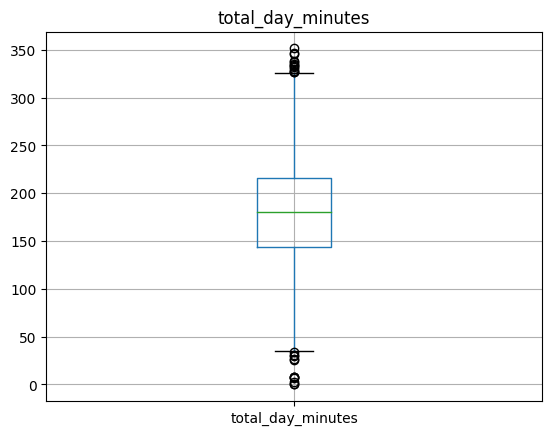

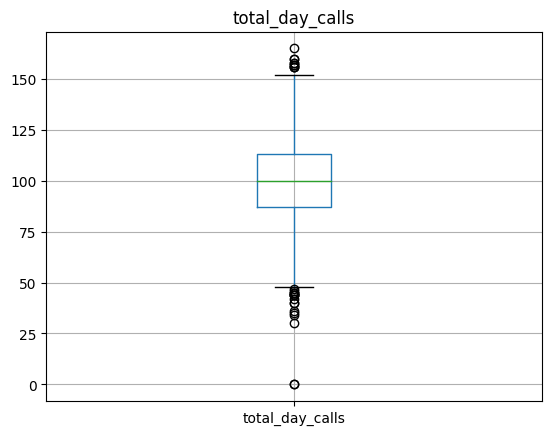

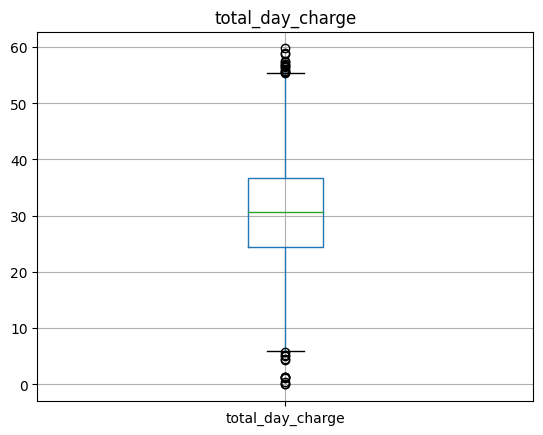

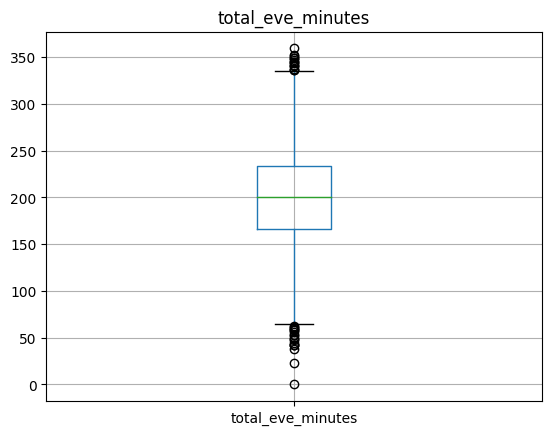

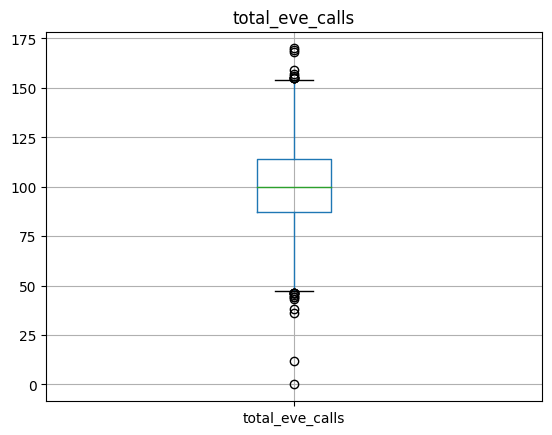

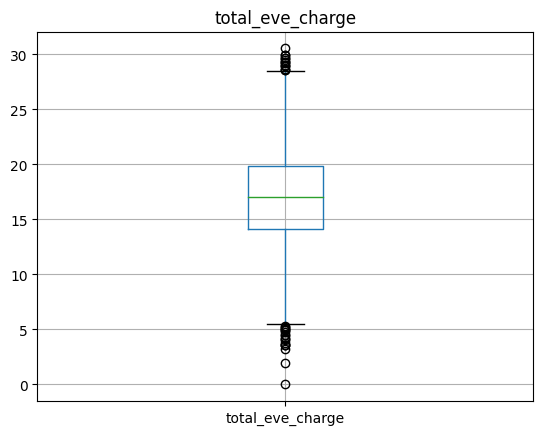

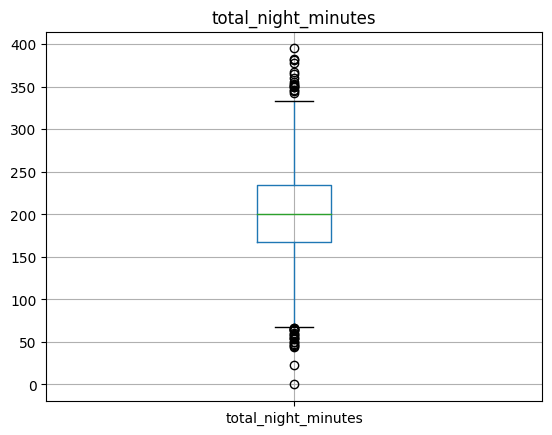

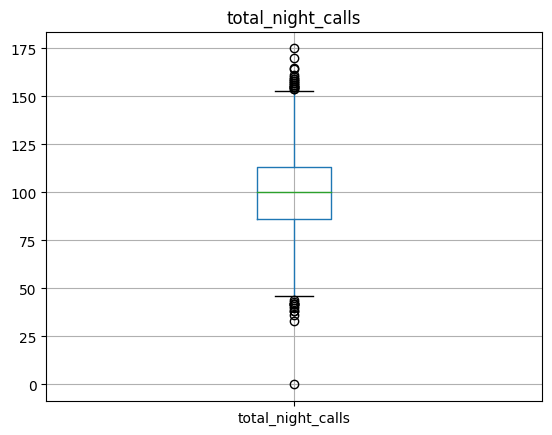

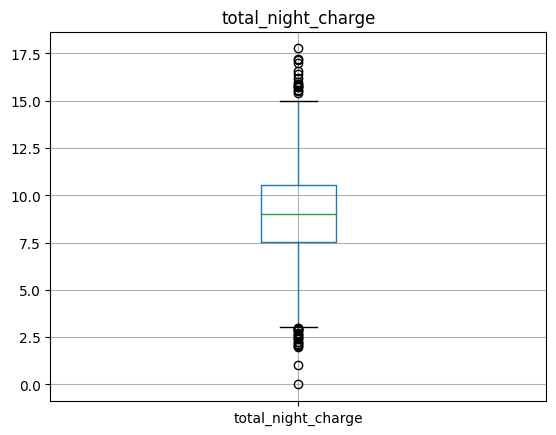

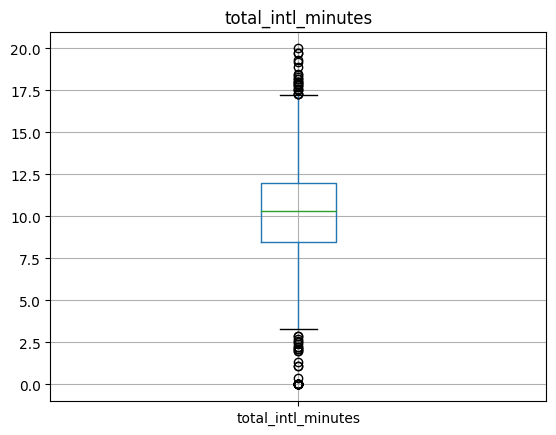

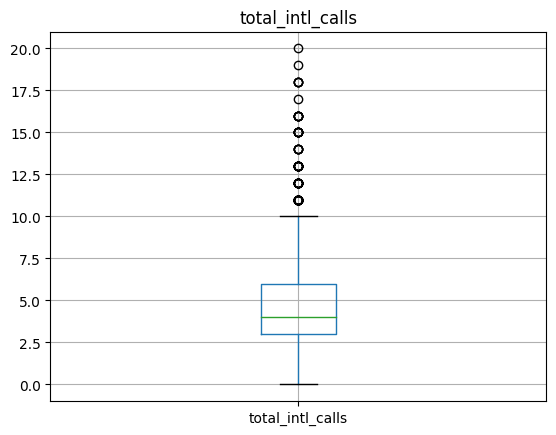

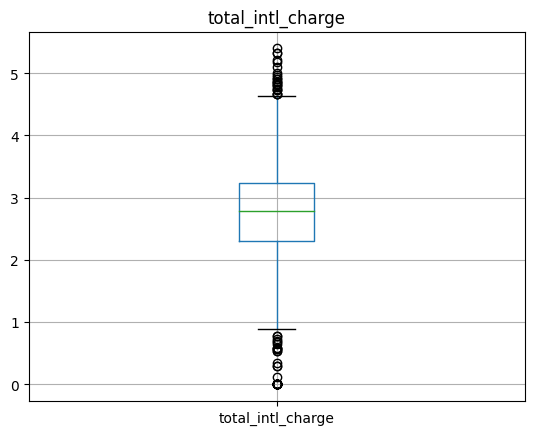

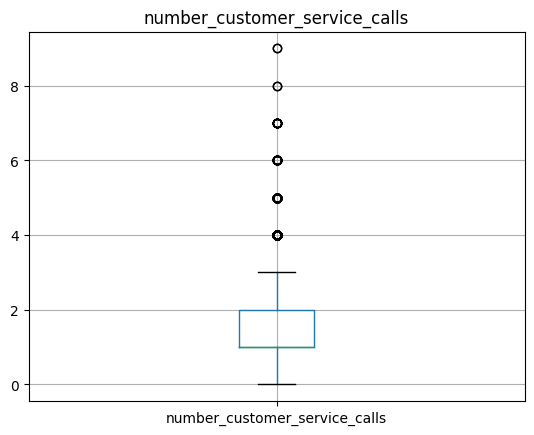

In [51]:
# Trực quan hóa sử dụng biểu đồ BoxPlot
for col in numeric_cols:
  customer_data.boxplot(column=[col])
  plt.title(col)
  plt.show()

# **3. Tiền xử lý dữ liệu - Data Preprocessing**

In [57]:
# Backup data
dataset = customer_data.copy()

In [58]:
# Biển đổi dữ liệu đầu vào thành dạng số nguyên sử dụng Hashing Encoder
he = ce.HashingEncoder(cols='state')
dataset_hash = he.fit_transform(dataset)
dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,area_code_415,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,0,0,0,0,0,0,1,0,73,area_code_408,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,1,0,0,0,0,0,0,0,75,area_code_408,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,0,0,0,0,0,0,1,0,50,area_code_408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [59]:
# One-hot các trường category
dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first=True)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,True,False,False,True,False
1,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,True,False,False,False,False
2,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,False,False,True,False,False
3,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,True,False,True,False,False
4,0,0,0,0,1,0,0,0,121,24,...,9.57,7.5,7,2.03,3,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,9.62,10.3,6,2.78,0,True,False,False,False,False
4246,0,0,0,0,0,0,1,0,73,0,...,8.38,11.5,6,3.11,3,False,False,False,False,False
4247,1,0,0,0,0,0,0,0,75,0,...,5.81,6.9,7,1.86,1,False,False,False,False,False
4248,0,0,0,0,0,0,1,0,50,40,...,13.39,9.9,5,2.67,2,False,False,False,True,False


In [60]:
# View correlation
corr = dataset_hash_dummy.corr()
corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.000000,-0.196588,-0.125256,-0.154772,-0.190807,-0.106960,-0.195436,-0.142426,0.013689,-0.011134,...,-0.004051,-0.003299,0.017064,-0.003344,-0.005630,0.006697,-0.018174,-0.002390,-0.011900,-0.044855
col_1,-0.196588,1.000000,-0.129957,-0.160581,-0.197968,-0.110974,-0.202771,-0.147772,-0.002419,-0.016284,...,-0.009430,0.011348,0.008412,0.011355,0.016493,0.008631,-0.014369,-0.013135,-0.019103,0.044542
col_2,-0.125256,-0.129957,1.000000,-0.102315,-0.126136,-0.070708,-0.129196,-0.094153,-0.003341,-0.026112,...,-0.002909,0.000378,0.019211,0.000454,-0.009246,-0.005667,0.004604,-0.013044,-0.018201,0.013421
col_3,-0.154772,-0.160581,-0.102315,1.000000,-0.155859,-0.087369,-0.159640,-0.116340,0.007931,0.026162,...,0.020298,-0.003335,-0.019786,-0.003316,0.010988,0.022971,-0.011248,0.014245,0.027464,-0.006681
col_4,-0.190807,-0.197968,-0.126136,-0.155859,1.000000,-0.107711,-0.196808,-0.143426,0.005678,0.006107,...,0.033361,-0.012685,-0.009887,-0.012722,-0.005834,-0.017611,-0.000300,0.020196,0.001124,0.021378
col_5,-0.106960,-0.110974,-0.070708,-0.087369,-0.107711,1.000000,-0.110324,-0.080400,-0.002614,0.019200,...,0.002236,-0.000872,-0.030583,-0.000867,0.007517,-0.002096,0.009094,0.012056,0.015435,0.029053
col_6,-0.195436,-0.202771,-0.129196,-0.159640,-0.196808,-0.110324,1.000000,-0.146906,-0.004608,0.006118,...,-0.015338,0.026359,0.019179,0.026381,-0.003174,0.002962,0.005596,-0.024772,0.002071,-0.031372
col_7,-0.142426,-0.147772,-0.094153,-0.116340,-0.143426,-0.080400,-0.146906,1.000000,-0.018534,-0.000394,...,-0.025942,-0.023956,-0.015914,-0.023984,-0.012005,-0.018878,0.034780,0.012884,0.009895,-0.015638
account_length,0.013689,-0.002419,-0.003341,0.007931,0.005678,-0.002614,-0.004608,-0.018534,1.000000,-0.006626,...,-0.009942,0.004539,0.013690,0.004494,0.001002,-0.000438,-0.019074,0.027050,0.001663,0.019378
number_vmail_messages,-0.011134,-0.016284,-0.026112,0.026162,0.006107,0.019200,0.006118,-0.000394,-0.006626,1.000000,...,0.018300,0.005220,0.006585,0.005249,-0.015303,0.009604,-0.007583,0.004808,0.954014,-0.100347


In [61]:
# Remove correlation columns
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])

# **4. Lựa chọn và đánh giá mô hình**

**4.1 Exp 01: Upsampling = SMOTE, Scale = MINMAX, Model: Logistic Regression**

In [64]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

#Scale

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

              precision    recall  f1-score   support

       False       0.89      0.95      0.92       721
        True       0.57      0.36      0.44       129

    accuracy                           0.86       850
   macro avg       0.73      0.65      0.68       850
weighted avg       0.84      0.86      0.85       850



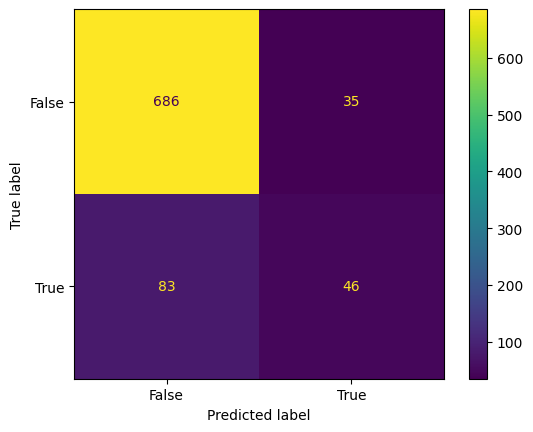

In [72]:
# Train model Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)

# Dự đoán trên tập dữ liệu test
y_pred = model_log.predict(X_test)

# In ra dữ liệu
print(classification_report(y_test, y_pred))

# Biểu diễn confusion matrix sử dụng hàm ConfusionMatrixDisplay.from_predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# **Đánh giá kết quả mô hình Logistic Regression**

Các chỉ số cho thấy mô hình gặp khó khăn khi nhận diện tệp khách hàng rời bỏ sử dụng dịch vụ (True)

-> Mô hình cần được cải thiện và chưa thể đưa vào sử dụng thực tế

**4.2 Exp 02: Không UpSampling, không Scale, Model: XGBOOST**

In [74]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)


              precision    recall  f1-score   support

       False       0.97      0.99      0.98       721
        True       0.92      0.81      0.86       129

    accuracy                           0.96       850
   macro avg       0.94      0.90      0.92       850
weighted avg       0.96      0.96      0.96       850



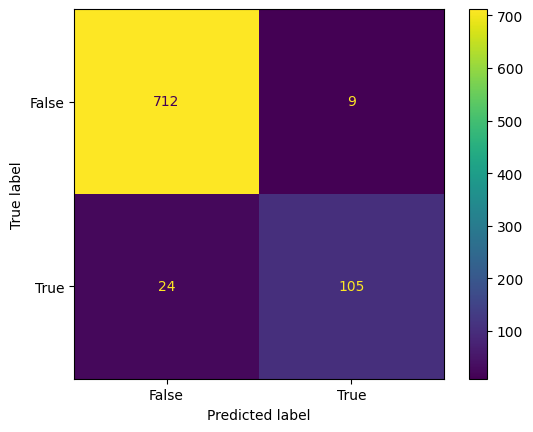

In [75]:
# XGBoost

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)

# In báo cáo kết quả
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


#**Đánh giá mô hình**
1. Precision (Độ chính xác)
False: 0.97 – Mô hình có độ chính xác cao trong việc dự đoán các trường hợp "False", nghĩa là hầu hết các dự đoán là đúng.
True: 0.92 – Độ chính xác cho "True" cũng tốt, nhưng có thể cải thiện hơn nữa.
2. Recall (Độ nhạy)
False: 0.99 – Mô hình rất nhạy với các trường hợp "False", phát hiện gần như tất cả các trường hợp thực tế.
True: 0.81 – Độ nhạy cho "True" có phần thấp hơn, cho thấy mô hình có thể bỏ sót một số trường hợp "True".
3. F1-Score
False: 0.98 – F1-score cao cho "False" cho thấy mô hình cân bằng tốt giữa precision và recall.
True: 0.86 – Mặc dù cũng khá tốt, nhưng có khoảng cách so với F1-score cho "False".
4. Support
False: 721 – Lượng mẫu lớn cho "False", cho thấy mô hình có đủ dữ liệu để học từ đó.
True: 129 – Lượng mẫu nhỏ hơn cho "True" có thể là nguyên nhân khiến độ nhạy không cao.
5. Accuracy (Độ chính xác tổng thể) 0.96 – Mô hình đạt độ chính xác tổng thể rất cao, cho thấy rằng nó hoạt động tốt với tập dữ liệu này.
6. Macro Average
Precision: 0.94 – Tương đối tốt nhưng cho thấy mô hình có thể cải thiện độ chính xác cho các trường hợp "True".
Recall: 0.90 – Khá ổn nhưng cũng có thể cần cải thiện, đặc biệt là cho lớp "True".
F1-Score: 0.92 – Một chỉ số tốt, nhưng nên chú ý đến lớp "True".
7. Weighted Average
Các chỉ số cao (đặc biệt là độ chính xác và độ nhạy cho "False") cho thấy mô hình hoạt động hiệu quả trong bối cảnh dữ liệu Imbalanced.
#**Kết luận**
Mô hình hoạt động tốt với tệp dữ liệu, có khả năng áp dụng vào thực tế